In this notebook we will present how to launch BALDUR in a toy example.



**Synthetic data generation**

First, as the model is intended to work in multimodal datasets, and distinguish which modalities are trully relevant, we will generate a multimodal binary classifcation dataset with 3 views, only one will be related with the targets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_classification



N = 1000 #Num of samples
D = 200 #Num of features

#Relevant view
X, y = make_classification(
        n_samples=N,
        n_features=D,
        n_classes=2,
        # n_informative=10,
        random_state=999
    )

X1 = X[:,:30]
X2 = X[:,30:100]
X3 = X[:,100:]

# #Random views
# X2 = np.random.rand(1000, 250)

# # Crear una matriz de 1000x3000
# X3 = np.random.rand(1000, 300)

Once we generated the database, we divide the data into train and test and standarize it.

In [2]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

X1_tr, X1_tst, Y_tr, Y_tst = tts(X1, y, test_size = 0.25, random_state = 31)
X2_tr, X2_tst, Y_tr, Y_tst = tts(X2, y, test_size = 0.25, random_state = 31)
X3_tr, X3_tst, Y_tr, Y_tst = tts(X3, y, test_size = 0.25, random_state = 31)



scaler = StandardScaler()
X1_tr = scaler.fit_transform(X1_tr)
X1_tst = scaler.transform(X1_tst)

scaler = StandardScaler()
X2_tr = scaler.fit_transform(X2_tr)
X2_tst = scaler.transform(X2_tst)

scaler = StandardScaler()
X3_tr = scaler.fit_transform(X3_tr)
X3_tst = scaler.transform(X3_tst)

**Training the model**

We import and define the model settings

In [3]:
import BALDUR_EAAI

#Concatenate the views into a list
X_tr = [X1_tr, X2_tr, X3_tr]
X_tst = [X1_tst, X2_tst, X3_tst]


#Define if the view is wide or not (0 not, 1 wide)
modalidades = [0,0,0]

Y_tr = Y_tr[:, np.newaxis]
Y_tst = Y_tst[:, np.newaxis]




########################
########################

#Define the model settings:
#- No prunning in that case as all the features are relevant
#- Kc = 1, as the problem is binary (maximum of a single latent dimension)

#Fit the model

myModel = BALDUR_EAAI.LR_ARD()
myModel.fit(X_tr, Y_tr, X_tst, Y_tst, states = modalidades, prune = 0, prune_feat = 0, Kc =1, maxit = 50)

Iteration:  0
Accuracy:  0.364
Balanced Accuracy:  0.3654179228943486
--------------
Iteration:  1
Accuracy:  0.696
Balanced Accuracy:  0.696300563236047
--------------
Iteration:  2
Accuracy:  0.796
Balanced Accuracy:  0.7966519428973817
--------------
Iteration:  3
Accuracy:  0.852
Balanced Accuracy:  0.852
--------------
Iteration:  4
Accuracy:  0.872
Balanced Accuracy:  0.8751926040061633
--------------
Iteration:  5
Accuracy:  0.88
Balanced Accuracy:  0.882051282051282
--------------
Iteration:  6
Accuracy:  0.88
Balanced Accuracy:  0.882051282051282
--------------
Iteration:  7
Accuracy:  0.88
Balanced Accuracy:  0.882051282051282
--------------
Iteration:  8
Accuracy:  0.88
Balanced Accuracy:  0.882051282051282
--------------
Iteration:  9
Accuracy:  0.88
Balanced Accuracy:  0.882051282051282
--------------
Iteration:  10
Accuracy:  0.88
Balanced Accuracy:  0.882051282051282
--------------
Iteration:  11
Accuracy:  0.876
Balanced Accuracy:  0.878600295079864
--------------
Itera

Final results:

In [4]:
print('Balanced accuracy: ', myModel.bal_accs[-1])

Balanced accuracy:  0.8695303991287078


Plot balanced accuracy evolution:

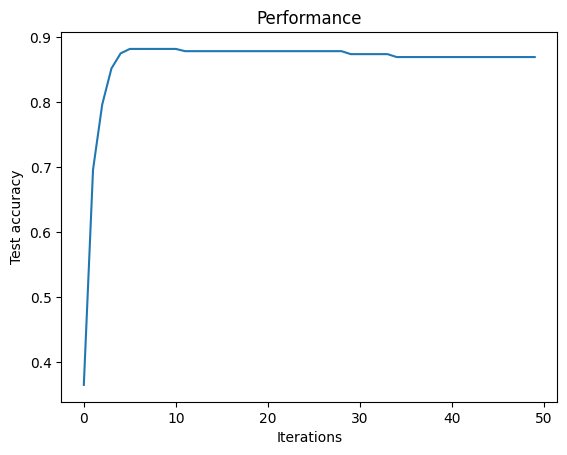

In [5]:
plt.plot(myModel.bal_accs)
plt.title('Performance')
plt.ylabel('Test accuracy')
plt.xlabel('Iterations')
plt.show()